In [1]:
from os import listdir
import os, contextlib
import sys
sys.path.append('../..')

import exp_test_quarantine
import numpy as np

import pandas as pd
from matplotlib.pyplot import *

from statsmodels.robust import mad

from IPython.display import display
pd.set_option('display.expand_frame_repr', False)


In [2]:
my_parser = exp_test_quarantine.argument_parser()
defaults = vars(my_parser.parse_args(""))
print(defaults)

{'S': 1000, 'T': 40, 'p0': 0.0001, 'p1': 0.025, 'alpha': 0.001, 'beta': 0.01, 'R0': 2.5, 'policy_start': 30, 'test_capacity': 0.01, 'qDays': 14, 'pDays': 5, 'pEI_threshold': 0.3, 'pSR_threshold': 0.7, 'seed': 42, 'iteration': 0, 'interactive': 'on', 'policy': 'contact'}


In [3]:
#directory = 'experiments/exp_5.2'
directory = '.'

In [4]:


def process( dir, args) :
    traces = np.genfromtxt(f'{directory}/{dir}/traces.csv', delimiter=',')
    qstats = np.genfromtxt(f'{directory}/{dir}/qstats.csv', delimiter=',')

    tmp = traces.cumsum(1)==args['T']-1

    res = { 'PS': tmp[:,0].mean(),
            'PE': (~tmp[:,0] & tmp[:,1]).mean(),
            'PI': (~tmp[:,0] & ~tmp[:,1] & tmp[:,2]).mean(),
            'PR': (~tmp[:,2]).mean(),
            'QS': qstats[:,0].sum(),
            'QE': qstats[:,1].sum(),
            'QI': qstats[:,2].sum(),
            'QR': qstats[:,3].sum(),
            'Q' : qstats.sum(),
            }
    return res

In [5]:
rows = []

for cmd in listdir(directory):
    try:
        args = cmd.replace("_"," ")
        with open(os.devnull, 'w') as devnull:
            with contextlib.redirect_stderr(devnull):
                args = vars(my_parser.parse_args(args.split()))
        res = process(cmd, args)
        rows.append({**args, **res})

    except SystemExit:
        print("error parsing {}, ignored".format(cmd) )

df = pd.DataFrame(rows)

error parsing results, ignored
error parsing .ipynb_checkpoints, ignored
error parsing exp_test_quarantine.py, ignored
error parsing analyse_results.ipynb, ignored
error parsing __pycache__, ignored
error parsing Makefile, ignored


In [6]:
iterations = ['iteration','seed']

results = [k for k in df.keys() if k not in defaults]
args = [k for k in defaults.keys() if k not in iterations]


print("iterations: ", iterations)
print("results: ", results)
print("args: ", args)


iterations:  ['iteration', 'seed']
results:  ['PS', 'PE', 'PI', 'PR', 'QS', 'QE', 'QI', 'QR', 'Q']
args:  ['S', 'T', 'p0', 'p1', 'alpha', 'beta', 'R0', 'policy_start', 'test_capacity', 'qDays', 'pDays', 'pEI_threshold', 'pSR_threshold', 'interactive', 'policy']


In [7]:
df_pivot = pd.pivot_table(df,
                          values = results,
                          index = args,
                          aggfunc=['count',np.mean, np.std, np.median, mad])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_pivot)

count                                     mean                                                                                  std                                                                                                median                                                                          mad                                                                                             
                                                                                                                                PE  PI  PR  PS   Q  QE  QI  QR  QS       PE       PI       PR       PS          Q      QE       QI       QR         QS        PE        PI        PR        PS            Q          QE           QI           QR           QS      PE      PI      PR      PS         Q     QE      QI      QR        QS        PE        PI        PR        PS            Q         QE           QI           QR           QS
S    T   p0     p1    alpha beta R0  policy_start test_capacity qDays pDays pEI_threshold pSR_threshold interactive policy                                                                                                                                                                                                                                                                                                                                                                                                                      
1000 150 0.0001 0.025 0.001 0.01 2.5 30           0.01          2     5     0.3           0.70          off         symptom     20  20  20  20  20  20  20  20  20  0.00905  0.08520  0.74955  0.15620     811.10    0.00   811.10     0.00       0.00  0.007067  0.041741  0.071141  0.029582    50.844345    0.000000    50.844345     0.000000     0.000000  0.0070  0.0890  0.7620  0.1460     828.0    0.0   828.0     0.0       0.0  0.005189  0.045219  0.064493  0.015567    37.806357   0.000000    37.806357     0.000000     0.000000
                                                                      7     0.3           0.70          off         contact     20  20  20  20  20  20  20  20  20  0.01850  0.09930  0.40815  0.47405   14787.85  370.70  2148.05  2393.90    9875.20  0.006109  0.019977  0.120818  0.109250  2756.571350   98.585309   544.032843  1010.684703  1233.013408  0.0180  0.1020  0.4280  0.4460   15342.5  383.5  2214.0  2443.0   10382.0  0.005930  0.014826  0.100817  0.068941  1748.729317  70.423605   450.711074   741.301109   689.410032
                                                                7     5     0.3           0.70          off         symptom     20  20  20  20  20  20  20  20  20  0.02310  0.13900  0.55440  0.28350    2321.50    0.00  2320.30     1.20       0.00  0.011684  0.039690  0.121486  0.083209   348.593641    0.000000   348.594486     1.436370     0.000000  0.0205  0.1385  0.5680  0.2660    2380.5    0.0  2380.0     1.0       0.0  0.010378  0.042254  0.081543  0.055598   319.500778   0.000000   322.465983     1.482602     0.000000
                                                                      7     0.3           0.70          off         contact     20  20  20  20  20  20  20  20  20  0.01110  0.04450  0.19825  0.74615   18624.60  200.80  1690.25  1759.55   14974.00  0.004241  0.013446  0.081351  0.090775  6089.301052  100.142845   647.309807   967.573333  4454.061813  0.0115  0.0460  0.2205  0.7190   20294.0  197.0  1797.0  1956.5   16384.5  0.004448  0.011861  0.065976  0.073389  4898.517730  89.697434   499.636948  1088.230028  3106.792949
                                                                14    5     0.1           0.90          off         lbp         20  20  20  20  20  20  20  20  20  0.00210  0.00790  0.05245  0.93755   29366.75   70.40   606.20   560.15   28130.00  0.001804  0.005505  0.016669  0.019278   232.119269   29.202379   201.199979   211.287351   483.367137  0.0020  0.0075  0.0530  0.9395   29370.0   68.0   565.0   567.5   2812

In [8]:
filter = {'S':1000, 'T':150, 'p0':0.0001, 'p1':0.025, 'alpha':0.001, 'beta': 0.01, 'R0':2.5, 
          'policy_start':30, 'test_capacity':0.01 }

idx = np.r_[[df_pivot.index.get_level_values(k)==v for k,v in filter.items()]].all(0)


df_52 = df_pivot[idx]

display(df_52)

count                                     mean  ...    median       mad                                                                                             
                                                                                                                                PE  PI  PR  PS   Q  QE  QI  QR  QS       PE  ...        QS        PE        PI        PR        PS            Q         QE           QI           QR           QS
S    T   p0     p1    alpha beta R0  policy_start test_capacity qDays pDays pEI_threshold pSR_threshold interactive policy                                                   ...                                                                                                                 
1000 150 0.0001 0.025 0.001 0.01 2.5 30           0.01          2     5     0.3           0.70          off         symptom     20  20  20  20  20  20  20  20  20  0.00905  ...       0.0  0.005189  0.045219  0.064493  0.015567    37.806357   0.000000    37.806357     0.000000     0.000000
                                                                      7     0.3           0.70          off         contact     20  20  20  20  20  20  20  20  20  0.01850  ...   10382.0  0.005930  0.014826  0.100817  0.068941  1748.729317  70.423605   450.711074   741.301109   689.410032
                                                                7     5     0.3           0.70          off         symptom     20  20  20  20  20  20  20  20  20  0.02310  ...       0.0  0.010378  0.042254  0.081543  0.055598   319.500778   0.000000   322.465983     1.482602     0.000000
                                                                      7     0.3           0.70          off         contact     20  20  20  20  20  20  20  20  20  0.01110  ...   16384.5  0.004448  0.011861  0.065976  0.073389  4898.517730  89.697434   499.636948  1088.230028  3106.792949
                                                                14    5     0.1           0.90          off         lbp         20  20  20  20  20  20  20  20  20  0.00210  ...   28126.5  0.001483  0.005189  0.017791  0.018533   297.261745  29.652044   173.464460   207.564311   458.865387
                                                                                          0.95          off         lbp         20  20  20  20  20  20  20  20  20  0.00100  ...   38228.5  0.000000  0.002965  0.017791  0.018533   257.972786  20.015130   206.823009   400.302599   812.466016
                                                                            0.2           0.90          off         lbp         20  20  20  20  20  20  20  20  20  0.00670  ...   12352.5  0.004448  0.018533  0.060045  0.077837   587.110479  22.980334   635.295051   285.400927   327.655090
                                                                                          0.95          off         lbp         20  20  20  20  20  20  20  20  20  0.00535  ...   15897.0  0.002965  0.019274  0.044478  0.061528   567.095349  22.980334   484.069624   422.541632   659.016686
                                                                            0.3           0.70          off         lockdown    20  20  20  20  20  20  20  20  20  0.00025  ...  116477.5  0.000000  0.001483  0.011861  0.010378     0.000000  34.841152   200.151299   993.343486  1206.838206
                                                                                                                    no          20  20  20  20  20  20  20  20  20  0.00665  ...       0.0  0.000741  0.031876  0.031876  0.016309     0.000000   0.000000     0.000000     0.000000     0.000000
                                                                                                                    symptom     20  20  20  20  20  20  20  20  20  0.02140  ...       0.0  0.004448  0.014826  0.125280  0.077095   661.981891   0.000000   676.807913    31.875948     0.000000
                                                                 

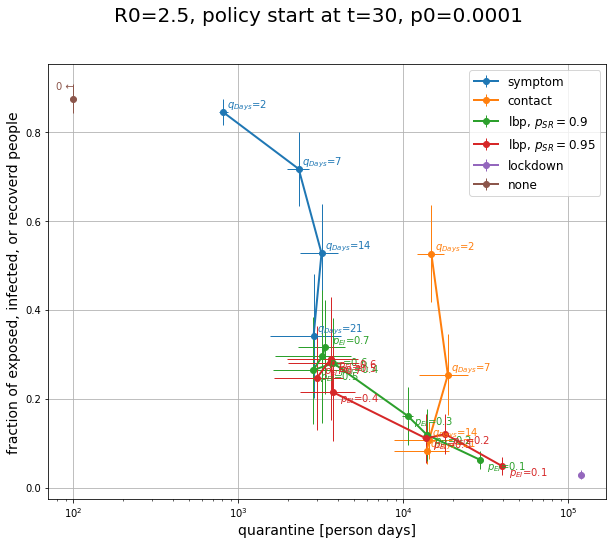

In [23]:
mu='mean'
si='std'

fig = figure(figsize=(10,8))
policies = df_52.index.unique('policy').values
pSR_threshold = df_52.index.unique('pSR_threshold').values

legends=[]
for policy in policies:
    for pSR in pSR_threshold:

        idx = (df_52.index.get_level_values('policy').values==policy) \
            & (df_52.index.get_level_values('pSR_threshold').values==pSR)
        
        if np.any(idx):

            qDays = df_52.loc[idx].index.get_level_values('qDays').values
            pEI_threshold = df_52.loc[idx].index.get_level_values('pEI_threshold').values

            x,y = df_52[idx][mu][['Q','PS']].values.T
            xd,yd = df_52[idx][si][['Q','PS']].values.T

            if policy=='no':
                x+=100
            y = 1-y

            eb=errorbar(x,y, xerr=xd, yerr=yd, fmt='-o', linewidth=2, elinewidth=1)

            if policy in ['contact','symptom']:
                for x,y,z in zip(x,y,qDays): 
                    annotate("$q_{{Days}}$={}".format(z), (x*1.05,y+0.01),color=eb[0].get_color())
                    pass
                legends.append(policy)

            elif policy in ['score','lbp']:
                for x,y,z in zip(x,y,pEI_threshold): 
                    y_offset = +0.01 if z==0.7 else -0.02
                    annotate("$p_{{EI}}$={}".format(z), (x*1.1,y+y_offset),color=eb[0].get_color())
                    pass
                legends.append("{}, $p_{{SR}}={}$".format(policy,pSR))    

            elif policy in ['no']:
                annotate("0 ←", (x[0],y[0]+0.02), ha='right', color=eb[0].get_color())
                legends.append('none')
                
            else:
                legends.append(policy)
    

gca().set_xscale('log')
grid(True)

xlabel('quarantine [person days]',fontsize=14)
ylabel('fraction of exposed, infected, or recoverd people',fontsize=14)
legend(legends,fontsize=12)
grid(True)
suptitle("R0={}, policy start at t={}, p0={}".format(filter['R0'], filter['policy_start'],filter['p0']),
         fontsize=20)

fig.savefig('experiment52.png')